In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.15.0


In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
test_images.shape

(10000, 28, 28)

In [37]:
len(test_labels)

10000

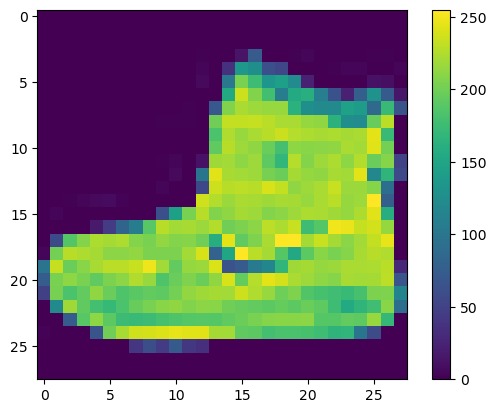

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
train_images = train_images / 255.0
test_images = test_images / 255.0

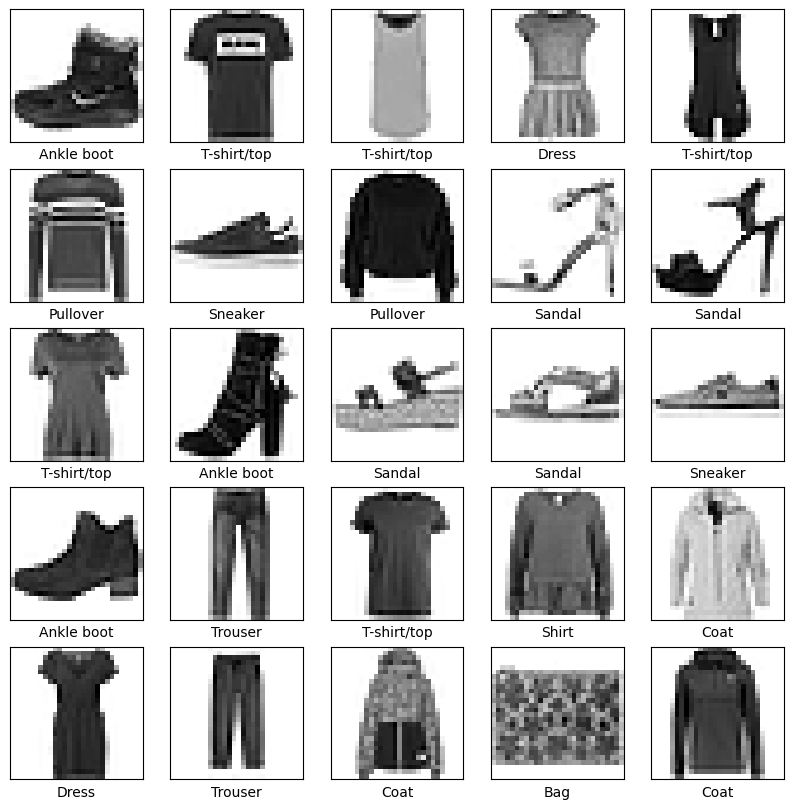

In [40]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5030 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3136 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2688 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2490 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest Accuracy:', test_acc)

313/313 - 1s - loss: 0.3303 - accuracy: 0.8808 - 771ms/epoch - 2ms/step

Test Accuracy: 0.8808000087738037


In [45]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [46]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [47]:
predictions[0]

array([3.6069755e-06, 5.0893139e-08, 5.3422269e-07, 5.3283792e-08,
       6.8667350e-07, 1.3368669e-03, 1.1436709e-06, 5.6729194e-02,
       2.3201717e-05, 9.4190460e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [50]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

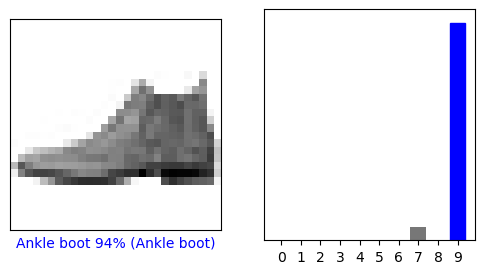

In [51]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

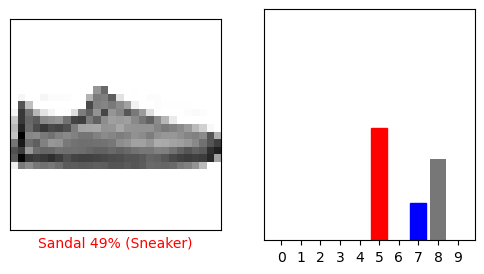

In [52]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

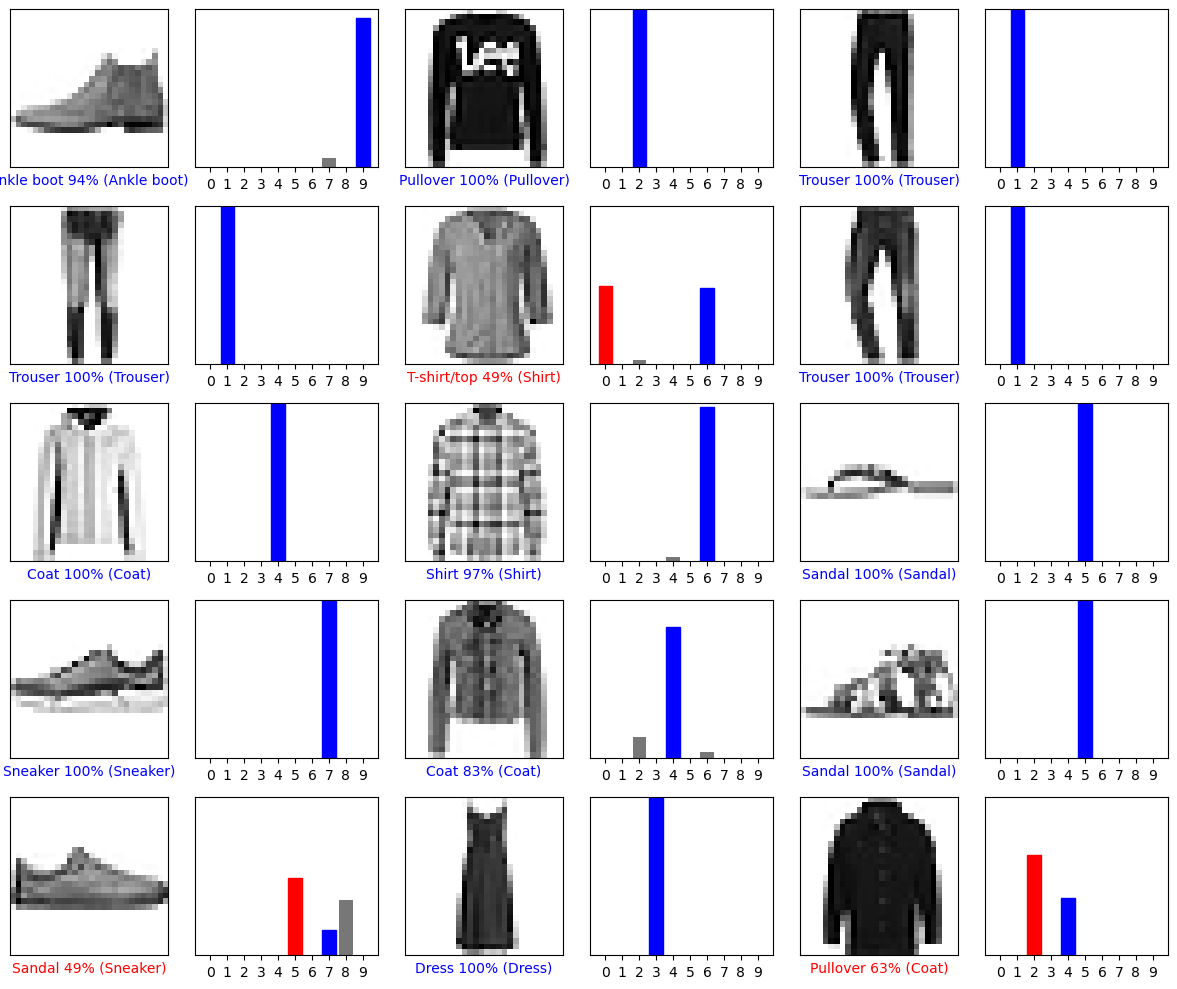

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [54]:
img = test_images[1]

print(img.shape)

(28, 28)


In [55]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 13ms/step
[[7.0905560e-05 1.4515790e-12 9.9851364e-01 4.4657431e-11 9.2429441e-04
  1.2260975e-12 4.9107958e-04 2.2735942e-15 1.5240563e-08 6.2909297e-13]]


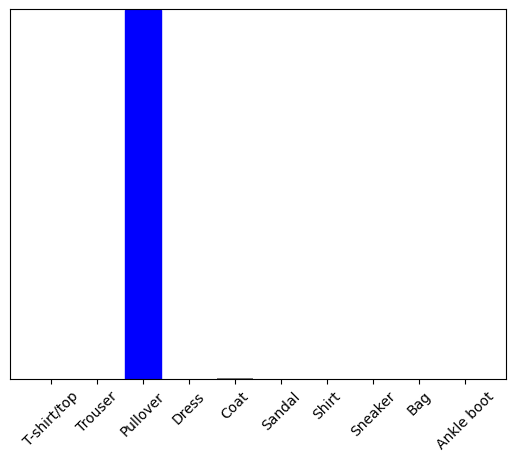

In [57]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [58]:
np.argmax(predictions_single[0])

2